In [16]:
import numpy as np
from ffnn import FFNN
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [17]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data'][:5000] / 255.0
y = mnist['target'][:5000].astype(int)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = FFNN(
    layer_sizes=[784, 64, 10],
    activations=['relu', 'softmax'],
    loss_function='mse',
    init_method='normal',
    regularization=None,
    seed=42
)

In [19]:
epochs = 10
learning_rate = 0.01
batch_size = 32
train_losses = []
val_losses = []

def calculate_accuracy(y_true, y_pred):
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    return np.mean(y_true_labels == y_pred_labels)

print("Start training...")
for epoch in range(epochs):
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]

    for start in range(0, X_train.shape[0], batch_size):
        end = start + batch_size
        X_batch = X_train[start:end]
        y_batch = y_train[start:end]

        output = model.forward(X_batch)
        grads_w, grads_b = model.backward(X_batch, y_batch)

        for i in range(len(model.weights)):
            model.weights[i] -= learning_rate * grads_w[i]
            model.biases[i] -= learning_rate * grads_b[i]

    train_pred = model.forward(X_train)
    val_pred = model.forward(X_val)

    train_loss = model.compute_loss(y_train, train_pred)
    val_loss = model.compute_loss(y_val, val_pred)

    train_acc = calculate_accuracy(y_train, train_pred)
    val_acc = calculate_accuracy(y_val, val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Train Acc: {train_acc:.4f} - Val Acc: {val_acc:.4f}")


Start training...
Epoch 1/10 - Train Loss: 0.0780 - Val Loss: 0.0783 - Train Acc: 0.5825 - Val Acc: 0.5820
Epoch 2/10 - Train Loss: 0.0559 - Val Loss: 0.0579 - Train Acc: 0.6973 - Val Acc: 0.6890
Epoch 3/10 - Train Loss: 0.0457 - Val Loss: 0.0509 - Train Acc: 0.7510 - Val Acc: 0.7210
Epoch 4/10 - Train Loss: 0.0409 - Val Loss: 0.0445 - Train Acc: 0.7752 - Val Acc: 0.7590
Epoch 5/10 - Train Loss: 0.0371 - Val Loss: 0.0418 - Train Acc: 0.7903 - Val Acc: 0.7710
Epoch 6/10 - Train Loss: 0.0341 - Val Loss: 0.0397 - Train Acc: 0.8060 - Val Acc: 0.7810
Epoch 7/10 - Train Loss: 0.0307 - Val Loss: 0.0377 - Train Acc: 0.8265 - Val Acc: 0.7940
Epoch 8/10 - Train Loss: 0.0300 - Val Loss: 0.0369 - Train Acc: 0.8263 - Val Acc: 0.7950
Epoch 9/10 - Train Loss: 0.0284 - Val Loss: 0.0354 - Train Acc: 0.8355 - Val Acc: 0.8050
Epoch 10/10 - Train Loss: 0.0259 - Val Loss: 0.0348 - Train Acc: 0.8482 - Val Acc: 0.8030


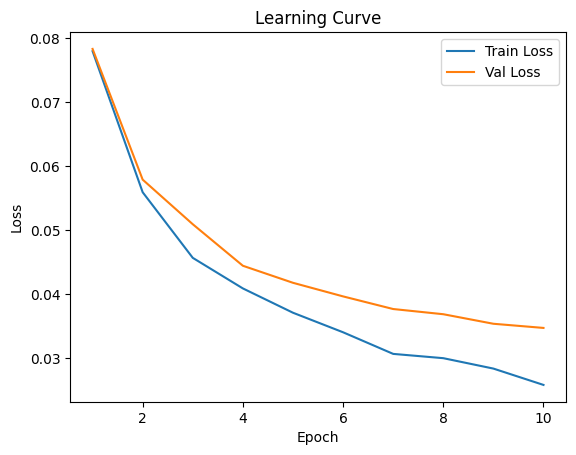

In [20]:
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [8]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 262.6 kB/s eta 0:00:43
   ---------------------------------------- 0.0/11.1 MB 262.6 kB/s eta 0:00:43
   ---------------------------------------- 0.0/11.1 MB 196.9 kB/s eta 0:00:57
   ---------------------------------------- 0.0/11.1 MB 196.9 kB/s eta 0:00:57
   ---------------------------------------- 0.1/11.1 MB 218.6 kB/s eta 0:00:51
   ---------------------------------------- 0.1/11.1 MB 275.8 kB/s eta 0:00:41
   ---------------------------------------- 0.1/11.1 MB 275.8 kB/s eta 0:00:41
   ---------------------------------------- 0.1/11.1 MB 275.8 kB/s eta 0:00:41
   ---------------------------------------- 0.1/11.1 MB 248.7 kB/s eta 0:00:45
    --------------------------------------- 0.1/11.1 MB 283.8 kB/s eta 0:00:39
    --------------------------------------- 0.1/11.1 MB 283.8 kB/s eta


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [10]:
print("Loading MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data'][:5000] / 255.0
y = mnist['target'][:5000].astype(int)

Loading MNIST...


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = MLPClassifier(
    hidden_layer_sizes=(784, 64, 10),  
    activation='relu',         
    solver='adam',             
    max_iter=10,               
    random_state=42
)

In [13]:
print("Training MLPClassifier...")
clf.fit(X_train, y_train)

Training MLPClassifier...


c:\Users\A S U S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(784, 64, 10), max_iter=10, random_state=42)

In [14]:
train_acc = clf.score(X_train, y_train)
val_acc = clf.score(X_val, y_val)

In [15]:
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

Train Accuracy: 0.9932
Validation Accuracy: 0.9330
